<a href="https://colab.research.google.com/github/WayneGretzky1/CSCI-4521-Applied-Machine-Learning/blob/main/1_3_kNN_with_SciKit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np

In [2]:
# load your data
df = pd.read_csv("https://raw.githubusercontent.com/be-prado/csci4521/refs/heads/main/Seeds.csv")
names = list(df.columns) #Save column names

In [3]:
#Choose which data is featuers (X) and labels (y)
X = df[ ['area','compactness'] ].to_numpy()
y = df['wheat_type'].to_numpy()

Helper functions!

In [4]:
def train_test_split(X,y,test_percent):
  numRows = y.size                     #number or rows in the entire dataset
  splitPoint = int((1-test_percent)*numRows)  #the row index test_size% of the way through
  p = np.random.permutation(numRows)   #array for shuffling data
  X = X[p]
  y = y[p]

  #Training data array
  X_train = X[:splitPoint]  # training features
  y_train = y[:splitPoint]  # training labels

  #Testing data array
  X_test = X[splitPoint:]  # testing features
  y_test = y[splitPoint:] # testing labels

  return X_train, X_test, y_train, y_test

In [5]:
def nn_classify_sample(train_features, train_labels, new_feature):
  dists = np.array([np.sum( (t-new_feature)**2) for t in train_features])
  nearest = dists.argmin()
  return train_labels[nearest]

def nn_classify(train_features, train_labels, test_features):
  num_result = test_features[:,0].size
  result = np.ones(num_result)
  for i in range(0,num_result):
    result[i] = nn_classify_sample(train_features[:,0:2], train_labels, test_features[i])
  return result

In [6]:
def accuracy(classify, X_train, y_train, X_test, y_test):
  pred = classify(X_train, y_train, X_test)
  correct_pred = (pred == y_test)
  total_preds = y_test.size
  return correct_pred.sum()/total_preds

In [7]:
def avg_accuracy(classifier, X, y, count = 200, split=0.33):
  acc = 0
  for _ in range(0,count):
    X_train, X_test, y_train, y_test = train_test_split(X,y,split)
    acc += accuracy(classifier, X_train, y_train, X_test, y_test)
  return acc/count

test our nearest neighbor with our train/test split

In [8]:
# TODO: create a train/test split where 1/3 of the data is used for testing
x_train, x_test, y_train, y_test = train_test_split(X, y, 0.33)
print(X.shape)
print(x_train.shape)
print(x_test.shape)

(210, 2)
(140, 2)
(70, 2)


In [9]:
# TODO: use our helper functions to compute the accuracy of a NN model with the above split
accuracy(nn_classify, x_train, y_train, x_test, y_test)


np.float64(0.7857142857142857)

In [16]:
# TODO: put both lines of code in the same block and run multiple times
# Q: Why does each run have different accuracies each run?
# Because we choose k to be small, we see very particular outputs
x_train, x_test, y_train, y_test = train_test_split(X, y, 0.33)
print(X.shape)
print(x_train.shape)
print(x_test.shape)
accuracy(nn_classify, x_train, y_train, x_test, y_test)

(210, 2)
(140, 2)
(70, 2)


np.float64(0.8428571428571429)

KNN implementation

In [17]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# TODO: write a function that will use KNN to classify a whole array of test features
# Hint: use a wrapper function so that it fits within our accuracy helper function!
def knn_classifier(k):
    def knn_classify(x_train, y_train, x_test):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train, y_train)

        return knn.predict(x_test)
    return knn_classify

In [52]:
# TODO: test it out with 2, 5, and 10 neighbors
x_train, x_test, y_train, y_test = train_test_split(X, y, 0.33)
knn = knn_classifier(10)
accuracy(knn, x_train, y_train, x_test, y_test)


np.float64(0.8714285714285714)

In [58]:
# TODO: test different amounts of neighbors with the cross-validation
knn = knn_classifier(2)
avg_accuracy(knn, X, y, split = 0.33)

np.float64(0.7978571428571435)

Finding the best K

In [66]:
# TODO: find the best performing K testing every third value between 1 - 90
ks = np.arange(1, 92, 3)
acc_list = []
for k in ks:
  my_knn = knn_classifier(k)
  acc = avg_accuracy(my_knn, X, y, split = 0.33)
  acc_list.append(acc)
print(acc_list)

[np.float64(0.8371428571428566), np.float64(0.8144285714285715), np.float64(0.8352142857142859), np.float64(0.8530714285714289), np.float64(0.8503571428571424), np.float64(0.8569285714285716), np.float64(0.8544285714285713), np.float64(0.8565714285714284), np.float64(0.8552857142857144), np.float64(0.8619285714285718), np.float64(0.8595714285714284), np.float64(0.8640714285714283), np.float64(0.8622142857142856), np.float64(0.8612857142857133), np.float64(0.857642857142857), np.float64(0.8616428571428565), np.float64(0.8614999999999999), np.float64(0.8601428571428569), np.float64(0.8657857142857139), np.float64(0.8659999999999992), np.float64(0.8636428571428568), np.float64(0.863428571428571), np.float64(0.8603571428571424), np.float64(0.8633571428571426), np.float64(0.8579999999999995), np.float64(0.8561428571428565), np.float64(0.8571428571428572), np.float64(0.8280714285714285), np.float64(0.8187857142857143), np.float64(0.7741428571428568), np.float64(0.7317857142857145)]


In [67]:
import seaborn as sns

<Axes: >

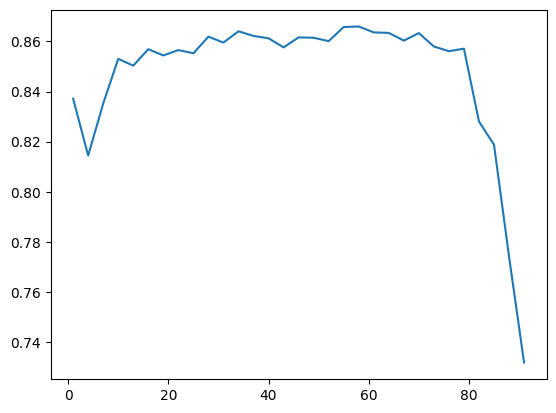

In [68]:
# TODO: use seaborn to plot a graph of the accuracies vs. ks
# Hint: use sns.lineplot
sns.lineplot(x=ks, y=acc_list)

<Axes: xlabel='k', ylabel='Accuracy'>

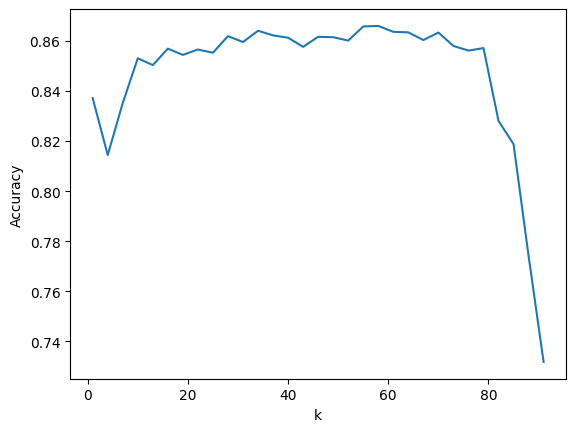

In [71]:
# If you have named dataframes, seaborn labels them auotmatically
# .... but this can be a pain sometimes
# TODO: lets turn our lists into dataframes so seaborn will label them
ks_df = pd.DataFrame(ks, columns = ["k"])
acc_df = pd.DataFrame(acc_list, columns = ["Accuracy"])
sns.lineplot(x = ks_df.k, y = acc_df.Accuracy)

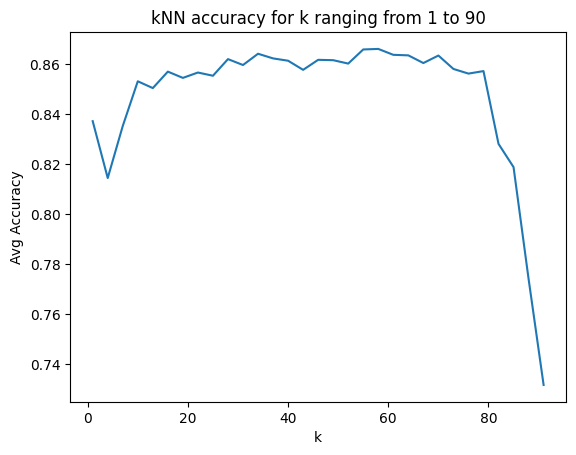

In [74]:
# Or we can just use matplotlibs pyplot package to control the labels and titles
# TODO: try it now!
# Hint: functions like plt.xlabel, plt.ylabel, and plt.title will be useful
import matplotlib.pyplot as plt
fig = sns.lineplot(x = ks, y = acc_list)
plt.xlabel("k")
plt.ylabel("Avg Accuracy")
plt.title("kNN accuracy for k ranging from 1 to 90")
plt.show(fig)

In [ ]:
# TODO: lets make another graph but this time lets compute the accuracy for both training and testing sets for different Ks
ks = np.arange(1,51)
test_acc_list = []
train_acc_list = []


In [ ]:
# helper for making a graph nicely
from pylab import rcParams
sns.set(font_scale=1.2)
sns.set_style("white") #whitegrid white dark darkgrid

rcParams['figure.figsize'] = 8, 6
result = pd.DataFrame( {"k":ks,"Train.Acc":train_acc_list,"Test.Acc":test_acc_list} )
pd.melt(result, ['k'])
sns.lineplot(x="k",y="value", hue='variable', data=pd.melt(result, ['k']))